In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
tensor = torch.tensor([1, 2, 3])
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [4]:
torch.cuda.device_count()

1

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [7]:
tensor_on_gpu.cpu().numpy()

array([1, 2, 3])

In [8]:
from torch import nn

In [9]:
import matplotlib.pyplot as plt

In [10]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [11]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [12]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_label, c='g', s=4, label='Test data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size': 14})

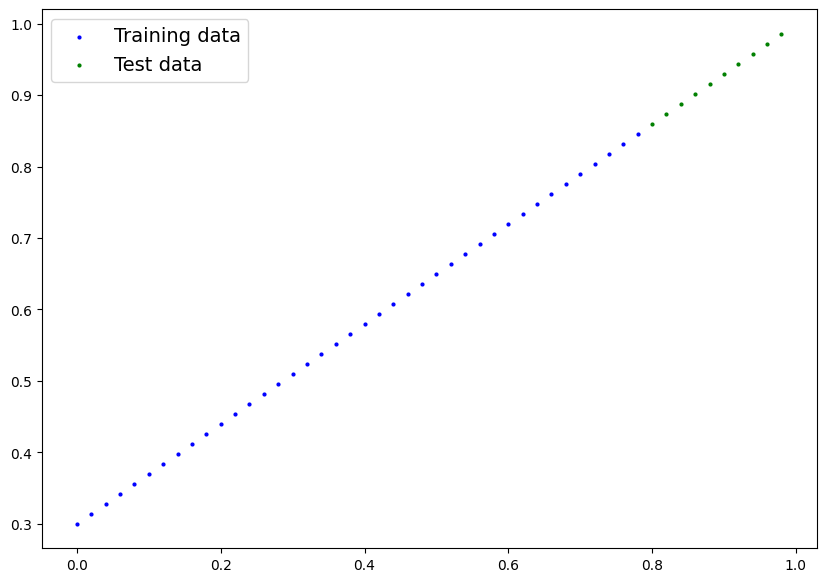

In [13]:
plot_predictions()

In [14]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias

In [15]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

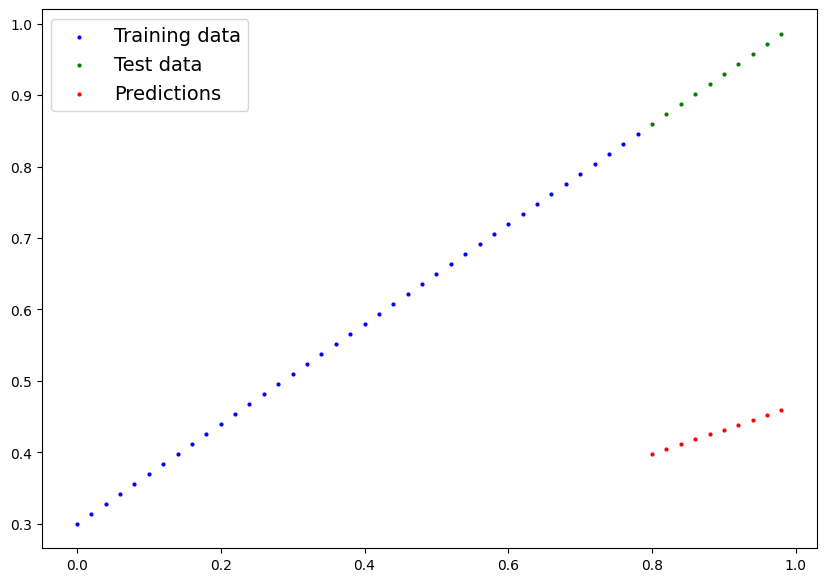

In [18]:
plot_predictions(predictions=y_pred)

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01,
                            momentum=0.9)

In [21]:
epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)
  
  loss = loss_fn(y_pred, y_train)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    y_test_pred = model_0(X_test)
    test_loss = loss_fn(y_test_pred, y_test)

  if epoch % 20 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epochs: {epochs} | Loss: {loss} | Test loss: {test_loss}')

Epochs: 300 | Loss: 0.10493002086877823 | Test loss: 0.23639337718486786
Epochs: 300 | Loss: 0.013318724930286407 | Test loss: 0.0003350143670104444
Epochs: 300 | Loss: 0.0028601873200386763 | Test loss: 0.016373971477150917
Epochs: 300 | Loss: 0.0013234684010967612 | Test loss: 0.003734846832230687
Epochs: 300 | Loss: 0.0008312198333442211 | Test loss: 0.00395034346729517
Epochs: 300 | Loss: 0.0005496813100762665 | Test loss: 0.0022735854145139456
Epochs: 300 | Loss: 0.0003656650078482926 | Test loss: 0.0015827607130631804
Epochs: 300 | Loss: 0.0002433697518426925 | Test loss: 0.0010426093358546495
Epochs: 300 | Loss: 0.0001619779213797301 | Test loss: 0.0006942830514162779
Epochs: 300 | Loss: 0.00010780592128867283 | Test loss: 0.000462759577203542
Epochs: 300 | Loss: 7.175170321715996e-05 | Test loss: 0.0003075925924349576
Epochs: 300 | Loss: 4.7755074774613604e-05 | Test loss: 0.0002048939059022814
Epochs: 300 | Loss: 3.178371844114736e-05 | Test loss: 0.00013630485045723617
Epochs

In [22]:
with torch.inference_mode():
  y_pred = model_0(X_test)

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6868])), ('bias', tensor([0.3054]))])

In [24]:
weight, bias

(0.7, 0.3)

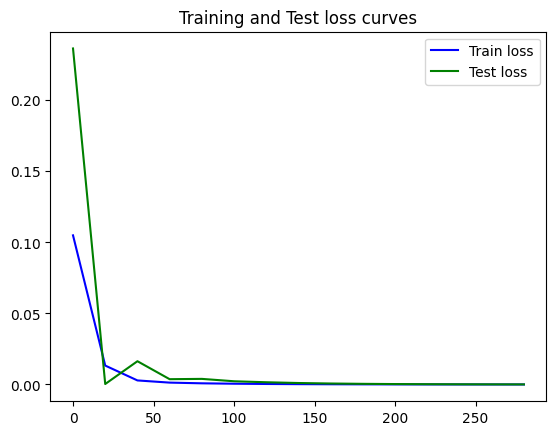

In [25]:
import numpy as np

loss_values = torch.tensor(loss_values).numpy()
test_loss_values = torch.tensor(test_loss_values).numpy()

plt.plot(epoch_count, loss_values, c='b', label='Train loss')
plt.plot(epoch_count, test_loss_values, c='g', label='Test loss')
plt.title('Training and Test loss curves')
plt.legend()
plt.show()

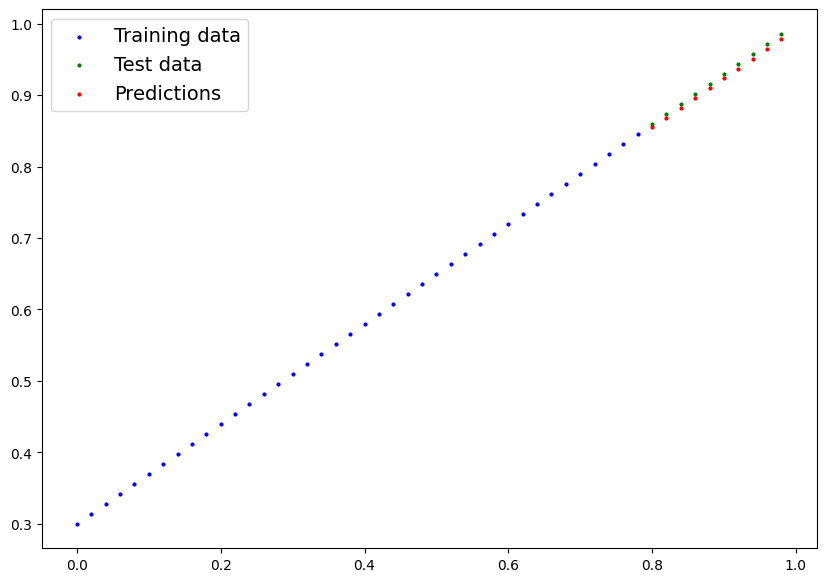

In [26]:
plot_predictions(predictions=y_pred)

In [27]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_PATH = MODEL_PATH / 'pytorch_workflow_model.pth'

print(f'Saving model to: {MODEL_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_PATH)

Saving model to: models/pytorch_workflow_model.pth


In [28]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_PATH))

<All keys matched successfully>

In [29]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6868])), ('bias', tensor([0.3054]))])